In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import norm


/var/folders/d4/299g0bm11rg1_wj8twkqwp1c0000gn/T/ipykernel_28860/1972624298.py:2: RuntimeWarning: invalid value encountered in divide
  return np.exp(-np.sin(100 * x)/x)


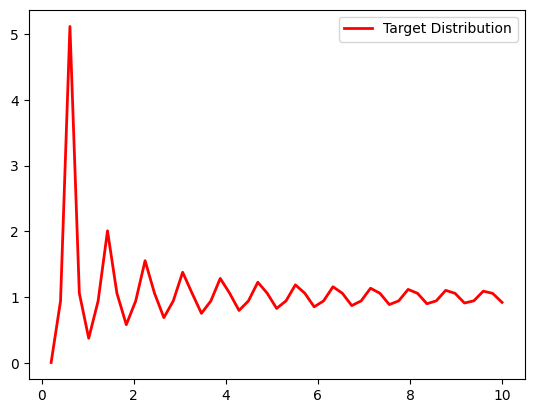

In [2]:
def target_distribution(x):
    return np.exp(-np.sin(100 * x)/x)

x_values = np.linspace(0, 10)
plt.plot(x_values, target_distribution(x_values), label='Target Distribution', linewidth=2, color='red')
plt.legend()
plt.show()

In [9]:

mu0 = 5
tau0 = 1.5

y0 = np.random.uniform(0, 10)

n = 10000

x = []
x.append(y0)

acceptance_num = 0
 
for t in range(1, n):
    y = np.random.normal(mu0,tau0)
    q_y_given_x = norm.pdf(y, mu0, tau0) ###  normal.density(y|mu0, tau0)
    q_x_given_y = norm.pdf(x[t-1], mu0, tau0) ### normal.density(x|mu0, tau0)
    u = np.random.uniform(0,1)
    logu = np.log(u)
    logalpha = min(0,np.log(target_distribution(y))+np.log((q_x_given_y))-np.log(target_distribution(x[t-1]))-np.log(q_y_given_x))
    #logalpha = np.log(alpha)
    #logalpha = min(-(np.sin((100*y)/y)) + np.sin((100*x[t-1])/x[t-1]) - ((y-mu0)**2/2*tau0**2) + ((x[t-1]-mu0)**2/2*tau0**2) ,0) 
    # print(logalpha)
    #alpha = min(1, target_distribution(y) * q_x_given_y/target_distribution(x[t]) * q_y_given_x)

    if logu <= logalpha :
        #  x[t] = y
         x.append(y)
         acceptance_num += 1
    else: 
        x.append(x[t-1])



acceptance_rate = acceptance_num / n

# samples.append(current_sample)

print(acceptance_num)

1528


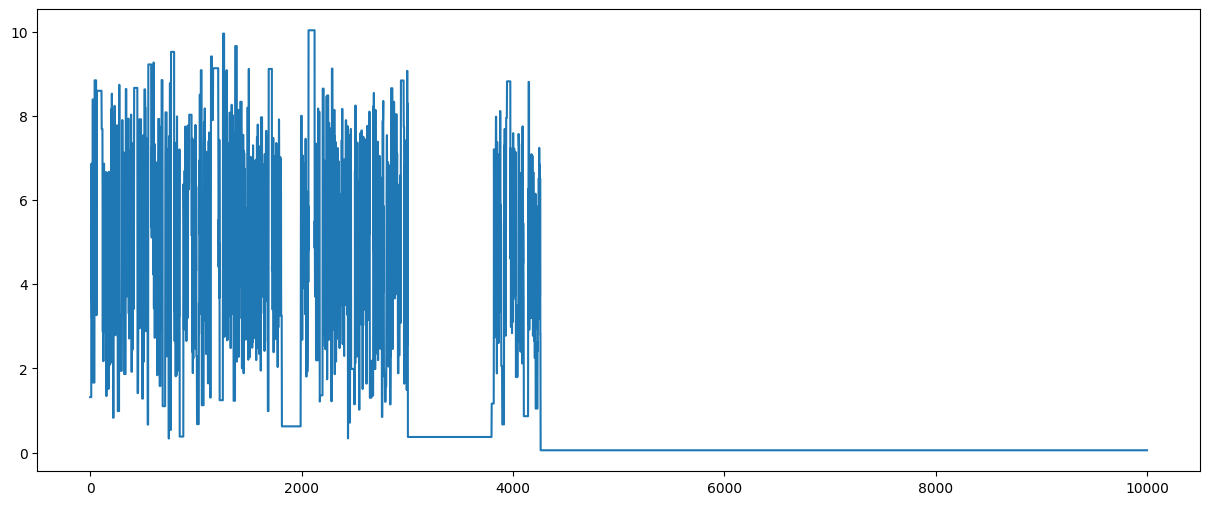

In [10]:
plt.figure(figsize=(15, 6))
plt.plot(x)
plt.show()

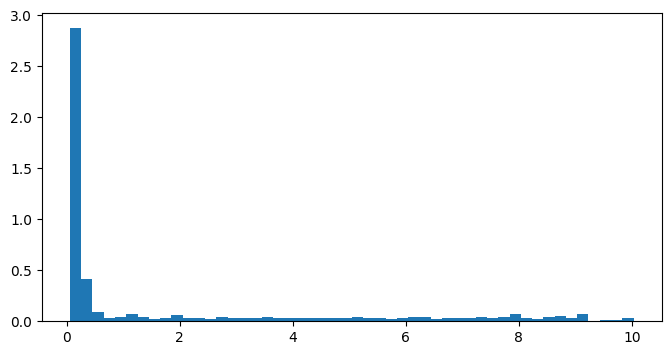

In [11]:
plt.figure(figsize=(8, 4))
plt.hist(x, bins=50,density=True)
plt.show()

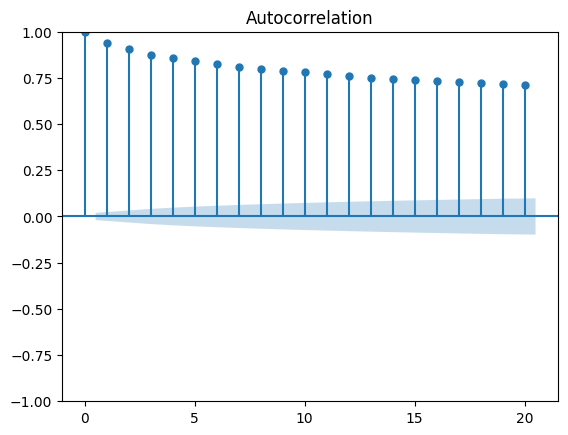

In [12]:
plot_acf(np.array(x), lags = 20)
plt.show()